In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# From here: https://www.kaggle.com/robertoruiz/sberbank-russian-housing-market/dealing-with-multicollinearity/notebook
macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
"micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
"income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]

In [4]:
df_train = pd.read_csv("train.csv", parse_dates=['timestamp'])
df_test = pd.read_csv("test.csv", parse_dates=['timestamp'])
df_macro = pd.read_csv("macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)

df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,30471.0,1.523792e+04,8.796502e+03,1.000000e+00,7.620500e+03,1.523800e+04,2.285550e+04,3.047300e+04
full_sq,30471.0,5.421427e+01,3.803149e+01,0.000000e+00,3.800000e+01,4.900000e+01,6.300000e+01,5.326000e+03
life_sq,24088.0,3.440327e+01,5.228573e+01,0.000000e+00,2.000000e+01,3.000000e+01,4.300000e+01,7.478000e+03
floor,30304.0,7.670803e+00,5.319989e+00,0.000000e+00,3.000000e+00,6.500000e+00,1.100000e+01,7.700000e+01
max_floor,20899.0,1.255897e+01,6.756550e+00,0.000000e+00,9.000000e+00,1.200000e+01,1.700000e+01,1.170000e+02
material,20899.0,1.827121e+00,1.481154e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
build_year,16866.0,3.068057e+03,1.543878e+05,0.000000e+00,1.967000e+03,1.979000e+03,2.005000e+03,2.005201e+07
num_room,20899.0,1.909804e+00,8.518045e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.900000e+01
kitch_sq,20899.0,6.399301e+00,2.826598e+01,0.000000e+00,1.000000e+00,6.000000e+00,9.000000e+00,2.014000e+03
state,16912.0,2.107025e+00,8.801481e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.300000e+01


,column_name,missing_count
24,hospital_beds_raion,14441
7,build_year,13605
10,state,13559
161,cafe_sum_500_max_price_avg,13281
160,cafe_sum_500_min_price_avg,13281
162,cafe_avg_price_500,13281
5,max_floor,9572
6,material,9572
8,num_room,9572
9,kitch_sq,9572


c:\python27\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


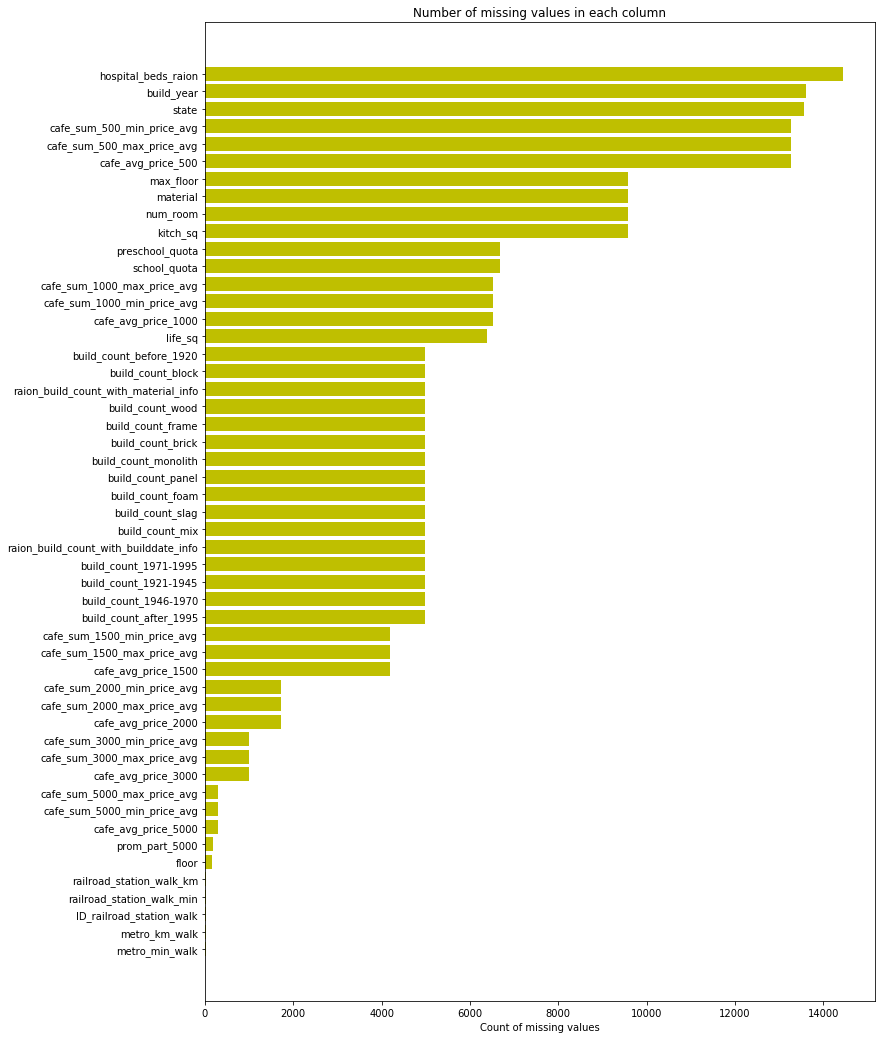

In [16]:
df_missing = df_train.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.ix[df_missing['missing_count']>0]
df_missing = df_missing.sort_values(by='missing_count', ascending=True)
ind = np.arange(df_missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, df_missing.missing_count.values, color='y')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [7]:
ax = df_train['price_doc'].hist(bins=50)

In [11]:
# ylog will be log(1+y), as suggested by https://github.com/dmlc/xgboost/issues/446#issuecomment-135555130
ylog_train_all = np.log1p(df_train['price_doc'].values)
id_test = df_test['id']

df_train.drop(['id', 'price_doc'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

# Build df_all = (df_train+df_test).join(df_macro)
num_train = len(df_train)
df_all = pd.concat([df_train, df_test])
df_all = pd.merge_ordered(df_all, df_macro, on='timestamp', how='left')
print(df_all.shape)

# Add month-year
month_year = (df_all.timestamp.dt.month + df_all.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_all['month_year_cnt'] = month_year.map(month_year_cnt_map)

# Add week-year count
week_year = (df_all.timestamp.dt.weekofyear + df_all.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_all['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week
df_all['month'] = df_all.timestamp.dt.month
df_all['dow'] = df_all.timestamp.dt.dayofweek

# Other feature engineering
df_all['rel_floor'] = df_all['floor'] / df_all['max_floor'].astype(float)
df_all['rel_kitch_sq'] = df_all['kitch_sq'] / df_all['full_sq'].astype(float)

# Remove timestamp column (may overfit the model in train)
df_all.drop(['timestamp'], axis=1, inplace=True)

(38133, 303)


In [12]:
# Deal with categorical values
df_numeric = df_all.select_dtypes(exclude=['object'])
df_obj = df_all.select_dtypes(include=['object']).copy()

for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

df_values = pd.concat([df_numeric, df_obj], axis=1)

In [13]:
# Convert to numpy values
X_all = df_values.values
print(X_all.shape)

# Create a validation set, with last 20% of data
num_val = int(num_train * 0.2)

X_train_all = X_all[:num_train]
X_train = X_all[:num_train-num_val]
X_val = X_all[num_train-num_val:num_train]
ylog_train = ylog_train_all[:-num_val]
ylog_val = ylog_train_all[-num_val:]

X_test = X_all[num_train:]

df_columns = df_values.columns

print('X_train_all shape is', X_train_all.shape)
print('X_train shape is', X_train.shape)
print('y_train shape is', ylog_train.shape)
print('X_val shape is', X_val.shape)
print('y_val shape is', ylog_val.shape)
print('X_test shape is', X_test.shape)

(38133L, 308L)
('X_train_all shape is', (30471L, 308L))
('X_train shape is', (24377L, 308L))
('y_train shape is', (24377L,))
('X_val shape is', (6094L, 308L))
('y_val shape is', (6094L,))
('X_test shape is', (7662L, 308L))


In [14]:
dtrain_all = xgb.DMatrix(X_train_all, ylog_train_all, feature_names=df_columns)
dtrain = xgb.DMatrix(X_train, ylog_train, feature_names=df_columns)
dval = xgb.DMatrix(X_val, ylog_val, feature_names=df_columns)
dtest = xgb.DMatrix(X_test, feature_names=df_columns)

In [28]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

# Uncomment to tune XGB `num_boost_rounds`
partial_model = xgb.train(xgb_params, dtrain, num_boost_round=1000, evals=[(dval, 'val')],
                       early_stopping_rounds=20, verbose_eval=20)

num_boost_round = partial_model.best_iteration

Will train until val error hasn't decreased in 20 rounds.
[0]	val-rmse:14.476440
[20]	val-rmse:5.276328
[40]	val-rmse:1.993605
[60]	val-rmse:0.867997
[80]	val-rmse:0.536147
[100]	val-rmse:0.456400
[120]	val-rmse:0.436562
[140]	val-rmse:0.429708
[160]	val-rmse:0.426496
[180]	val-rmse:0.424160
[200]	val-rmse:0.423050
[220]	val-rmse:0.422259
[240]	val-rmse:0.421794
[260]	val-rmse:0.421249
[280]	val-rmse:0.420562
[300]	val-rmse:0.420338
[320]	val-rmse:0.420233
[340]	val-rmse:0.420119
[360]	val-rmse:0.419959
[380]	val-rmse:0.419675
[400]	val-rmse:0.419420
[420]	val-rmse:0.419700
Stopping. Best iteration:
[406]	val-rmse:0.419283



In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(partial_model, max_num_features=50, height=0.5, ax=ax)

AttributeError: Unknown property max_num_features

In [30]:
num_boost_round = partial_model.best_iteration

In [ ]:
model = xgb.train(dict(xgb_params, silent=0), dtrain_all, num_boost_round=num_boost_round)

In [29]:
ylog_pred = model.predict(dtest)
y_pred = np.exp(ylog_pred) - 1

df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

df_sub.to_csv('sub.csv', index=False)